In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Load Dataset
data=pd.read_csv('/content/Happy_Dataset.csv')
data.head()

,X1,X2,X3,X4,X5,X6,D
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [ ]:
#Key Statistics
data.describe()

,X1,X2,X3,X4,X5,X6,D
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


<Axes: >

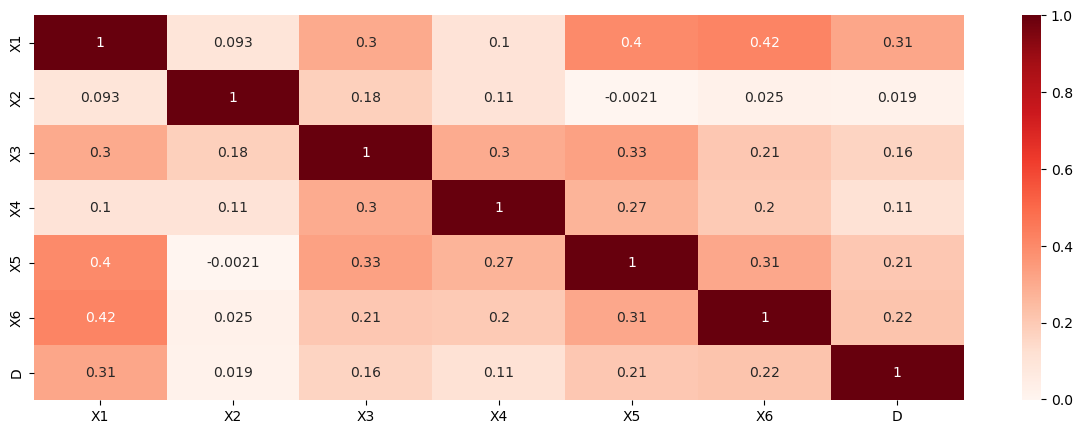

In [ ]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap="Reds")

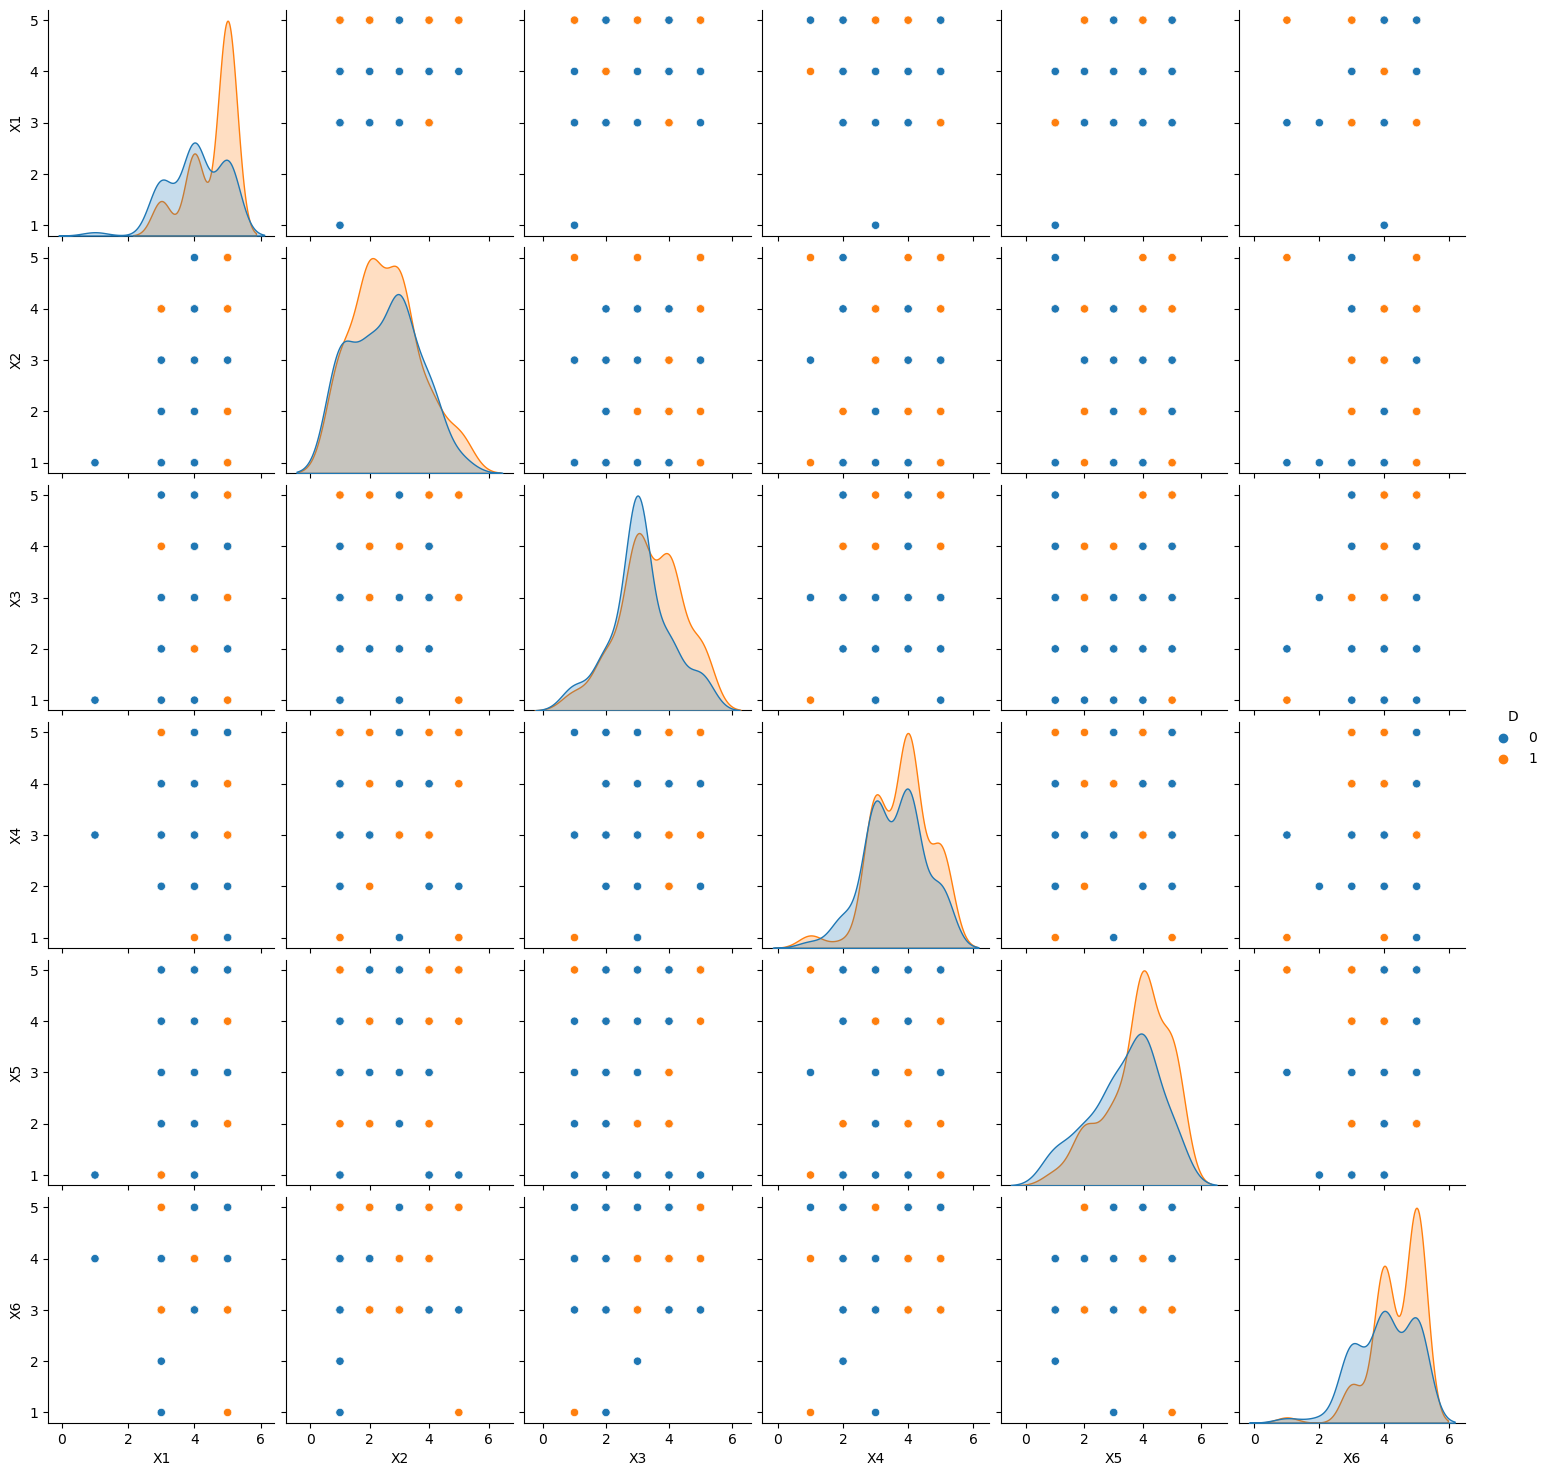

In [ ]:
# Pairplot with hue=Outcome
sns.pairplot(data, hue ='D')

In [ ]:
#Create x and y variables
x=data.drop('D', axis=1).to_numpy()
y=data['D'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [ ]:
#Script for NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

for name,method in [('Naive Bayes',GaussianNB())]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))


Estimator: Naive Bayes
[[ 5  8]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.65      0.94      0.77        16

    accuracy                           0.69        29
   macro avg       0.74      0.66      0.65        29
weighted avg       0.73      0.69      0.66        29



In [ ]:
#Script for Logistical Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

for name,method in [('Logistic Regression', LogisticRegression(random_state=100))]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Class 0','Class 1']
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names=target_names))

[[ 7  6]
 [ 2 14]]
              precision    recall  f1-score   support

     Class 0       0.78      0.54      0.64        13
     Class 1       0.70      0.88      0.78        16

    accuracy                           0.72        29
   macro avg       0.74      0.71      0.71        29
weighted avg       0.73      0.72      0.71        29



In [ ]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,3,2),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)
mlp.fit(x_train2, y_train)
predictions = mlp.predict(x_test2)

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[7 6]
 [7 9]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.60      0.56      0.58        16

    accuracy                           0.55        29
   macro avg       0.55      0.55      0.55        29
weighted avg       0.56      0.55      0.55        29

